<b>FAZER TABELAS DE FREQUÊNCIAS USANDO PYTHON</b>


Vamos precisar para além do numpy, do pandas.
Vamos ler um ficheiro em fomato csv (comma separated value). O python tratará do resto.

Para saber em que directoria estamos usamos:


In [1]:
import numpy as np
import pandas as pd
import os

os.getcwd()

'C:\\Users\\nequi'

Para mudar de directoria usar:

In [2]:
import numpy as np
import pandas as pd
import os

os.chdir("/Users")
os.getcwd()
os.chdir("/Users/nequi")
os.getcwd()

'C:\\Users\\nequi'

para importar um ficheiro csv:

In [3]:
import numpy as np
import pandas as pd
import os

dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados

Para verificar que tudo ok:

In [4]:
import numpy as np
import pandas as pd
import os

dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
dados.describe()


N   Paciente     partos     Idades
count  40.000000  40.000000  40.000000  40.000000
mean   19.500000  20.500000   2.225000  49.875000
std    11.690452  11.690452   1.527315  11.721529
min     0.000000   1.000000   0.000000  30.000000
25%     9.750000  10.750000   1.000000  41.500000
50%    19.500000  20.500000   2.000000  47.000000
75%    29.250000  30.250000   3.000000  60.250000
max    39.000000  40.000000   8.000000  69.000000

Para verificar o ficheiro:

In [5]:
import numpy as np
import pandas as pd
import os

dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
dados.head(20)   #podemos ler o ficheiro desta forma

N  Paciente  partos  Idades
0    0         1       4      68
1    1         2       0      48
2    2         3       2      46
3    3         4       3      45
4    4         5       2      56
5    5         6       2      67
6    6         7       3      34
7    7         8       3      56
8    8         9       0      34
9    9        10       3      50
10  10        11       1      34
11  11        12       2      66
12  12        13       8      57
13  13        14       3      46
14  14        15       4      42
15  15        16       2      34
16  16        17       1      62
17  17        18       2      36
18  18        19       2      47
19  19        20       2      68

Para verificar o número de colunas e linhas:

In [6]:
import numpy as np
import pandas as pd
import os

dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
dados.shape  #número de colunas, número de linhas

(40, 4)

Para fazer uma tabela com os dados:

In [9]:
import numpy as np
import pandas as pd
import os

dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados

partos = pd.crosstab(index=dados["partos"],  # Fazer uma tabela
                              columns="contagem")      # Name the count column
partos

col_0   contagem
partos          
0              5
1              6
2             14
3             10
4              3
5              1
8              1

Mas não é bem isto que nós queremos, precisamos de definir intervalos...

In [91]:
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,5,10]
group = ['0-5','5-10']
partos = pd.cut(dados["partos"],bins=bins,labels=group)
partos2 = partos.groupby(partos).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
partos2.columns=['partos','contagem']
partos2



partos  contagem
0    0-5        39
1   5-10         1

Mas já vimos que os bins devem ser menores, para se conseguir ver melhor.

In [92]:
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8,10]
group = ['0-2','2-4','4-6','6-8','8-10']
partos = pd.cut(dados["partos"],bins=bins,labels=group)
partos2 = partos.groupby(partos).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
partos2.columns=['partos','contagem']
partos2
#print(partos2)

partos  contagem
0    0-2        25
1    2-4        13
2    4-6         1
3    6-8         1
4   8-10         0

Podemos ainda ver as frequências num gráfico:
    

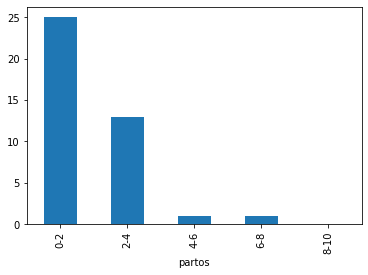

In [93]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8,10]
group = ['0-2','2-4','4-6','6-8','8-10']
partos = pd.cut(dados["partos"],bins=bins,labels=group)
# partos2.columns=['partos','contagem']
partos2 = partos.groupby(partos).size().plot(kind='bar')




Ou fazer o histograma.

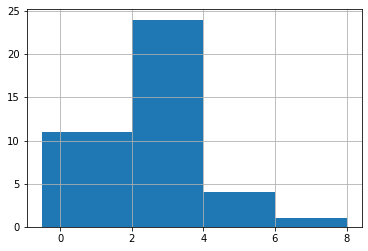

In [127]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8]
group = ['0-2','2-4','4-6','6-8']
dados['partos'].hist(bins=bins)


Podemos fazer o mesmo para as actividades.

In [111]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [29,35,40,45,50,55,60,65,70,75]
group = ['25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75']
dados['Idades'].hist(bins=bins)
#A = pd.cut(dados["Idades"],bins=bins,labels=group)
#A2 = A.groupby(A).size().plot(kind='bar')
#A2=A.groupby(A).size()
#hist=A2.hist(bins=bins)

Podemos usar a seguinte técnica para escrever os dados (que também pode ser usada para fazer gráfico "tipo histograma").

In [121]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [29,35,40,45,50,55,60,65,70,75]
group = ['30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75']
#dados['Idades'].hist(bins=bins)


A = pd.cut(dados["Idades"],bins=bins,labels=group)

# A2 = A.groupby(A).size().plot(kind='bar')
A2 = A.groupby(A).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
A2.columns=['Idades','contagem']
A2

Idades  contagem
0  30-35         6
1  35-40         4
2  40-45         4
3  45-50        10
4  50-55         0
5  55-60         6
6  60-65         4
7  65-70         6
8  70-75         0

Ou para as idades. (histograma)

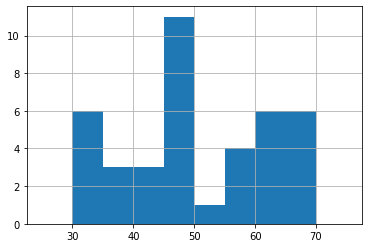

In [116]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [25,30,35,40,45,50,55,60,65,70,75]
dados['Idades'].hist(bins=bins)

Ou usando a técnica referida.

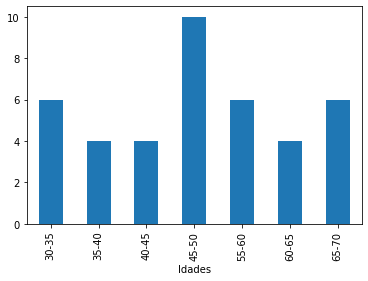

In [122]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [29,35,40,45,50,60,65,70]
group = ['30-35','35-40','40-45','45-50','55-60','60-65','65-70']
I = pd.cut(dados["Idades"],bins=bins,labels=group)
I2 = I.groupby(I).size().plot(kind='bar')
# I2 = I.groupby(I).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'})
# I2.columns=['Idades','contagem']
# I2

Podemos também querer fazer uma tabela com frequências relativas. Vamos fazer isso para as idades.

([<matplotlib.patches.Wedge at 0x23b4098f408>,
 [Text(0.9801071672559598, 0.4993895680663527, '29-35'),
  Text(0.33991864973549485, 1.0461621822461364, '35-40'),
  Text(-0.3399187476842659, 1.0461621504206509, '40-45'),
  Text(-1.0864571843213078, 0.1720778505113769, '45-50'),
  Text(-0.49938947630209474, -0.9801072140121813, '55-60'),
  Text(0.33991879665865016, -1.0461621345079049, '60-65'),
  Text(0.9801072373902886, -0.4993894304199647, '65-70')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(0.1854101725829972, 0.5706339175888016, '10.0%'),
  Text(-0.18541022600959955, 0.5706339002294459, '10.0%'),
  Text(-0.5926130096298042, 0.09386064573347828, '25.0%'),
  Text(-0.27239425980114257, -0.5346039349157352, '15.0%'),
  Text(0.18541025272290007, -0.5706338915497662, '10.0%'),
  Text(0.53460394766743, -0.2723942347745262, '15.0%')])

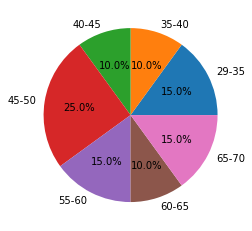

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [29,35,40,45,50,60,65,70]
group = ['30-35','35-40','40-45','45-50','55-60','60-65','65-70']
I = pd.cut(dados["Idades"],bins=bins,labels=group)
I1 = I.groupby(I).size()
I2=I1/len(I)*100
# I2
I3 = I2.loc[lambda I2: I2 != 0]
I3
group2 = ['29-35','35-40','40-45','45-50','55-60','60-65','65-70']
# plt.bar(group,I2)
# plt.tight_layout()
plt.pie(I3, labels=group2,autopct='%1.1f%%')

Podemos também fazer tabelas com frequências cumulativas:
(exemplo peso)

In [95]:
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8,10]
group = ['0-2','2-4','4-6','6-8','8-10']
partos = pd.cut(dados["partos"],bins=bins,labels=group)
partos2 = partos.groupby(partos).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'}) 

partos2.columns=['partos','Frequências']
partos2['Relativas (%)']=(partos2['Frequências']/len(dados))*100
partos2['Acumuladas'] = partos2['Frequências'].cumsum()
partos2['Acumuladas (%)']=(partos2['Acumuladas']/len(dados))*100

partos2


partos  Frequências  Relativas (%)  Acumuladas  Acumuladas (%)
0    0-2           25           62.5          25            62.5
1    2-4           13           32.5          38            95.0
2    4-6            1            2.5          39            97.5
3    6-8            1            2.5          40           100.0
4   8-10            0            0.0          40           100.0

Podemos inclusive fazer um plot:

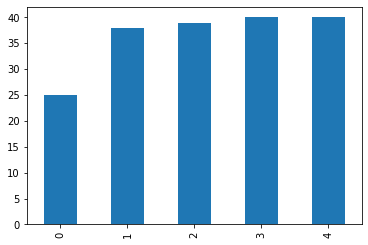

In [96]:
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8,10]
group = ['0-2','2-4','4-6','6-8','8-10']
partos = pd.cut(dados["partos"],bins=bins,labels=group)
partos2 = partos.groupby(partos).size().reset_index(name='Count').rename(columns={'Col1':'Col_value'}) 
# df_bins=pd.cut(x=df_bins[dados['partos ']], bins=[0,10,20,30,40,50,60,70,80,90,100])
partos2.columns=['partos','contagem']
partos2['Relativo (%)']=(partos2['contagem']/len(dados))*100
partos2['Acumulado'] = partos2['contagem'].cumsum()
# partos2.plot(kind='bar')
#partos2['Relativo (%)'].plot(kind='bar')
#partos2['Acumulado'].plot(kind='bar')
partos2['Acumulado'].plot(kind='bar')

No estilo histograma:

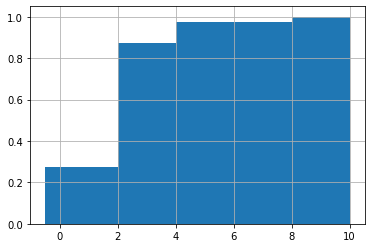

In [97]:
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8,10]
dados['partos'].hist(bins=bins,cumulative=True,density=True)


([<matplotlib.patches.Wedge at 0x23b40abf388>,
 [Text(-0.42095177560159874, 1.0162674857624154, '0-2'),
  Text(0.25678986018396527, -1.0696069220544058, '2-4'),
  Text(1.0696068935040468, -0.25678997910475926, '4-6'),
  Text(1.096609060945089, -0.08630508358799216, '6-8')],
 [Text(-0.22961005941905382, 0.5543277195067721, '62.5%'),
  Text(0.14006719646398103, -0.5834219574842212, '32.5%'),
  Text(0.5834219419112983, -0.14006726132986866, '2.5%'),
  Text(0.5981503968791394, -0.04707550013890481, '2.5%')])

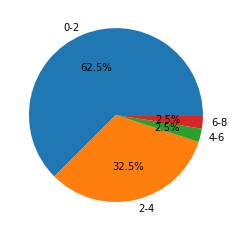

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


dados = pd.read_csv("exerciciocasa1.csv")     #ler os dados
bins = [-0.5,2,4,6,8]
group = ['0-2','2-4','4-6','6-8']
I = pd.cut(dados["partos"],bins=bins,labels=group)
I1 = I.groupby(I).size()
I2=I1/len(I)*100
# I2
I3 = I2.loc[lambda I2: I2 != 0]
I3
group2 = ['0-2','2-4','4-6','6-8']
# plt.bar(group,I2)
# plt.tight_layout()
plt.pie(I3, labels=group2,autopct='%1.1f%%')